# CAPM and the Security Market Line (SML)

The **Capital Asset Pricing Model (CAPM)** expresses the expected return of an asset as a linear function of its **systematic risk (beta)**:

$$
E(r_i) = r_f + \beta_i \left(E(r_m) - r_f\right)
$$

Where:  
- $E(r_i)$ = expected return of asset $i$  
- $r_f$ = risk-free rate  
- $E(r_m)$ = expected return of the market portfolio  
- $\beta_i$ = systematic risk of asset $i$  
- $E(r_m) - r_f$ = market risk premium  

---

## Beta Definition

Beta measures how sensitive an asset’s return is to the market:

$$
\beta_i = \frac{\text{Cov}(r_i, r_m)}{\text{Var}(r_m)}
$$

Where:  
- $\text{Cov}(r_i, r_m)$ = covariance between asset $i$ and the market  
- $\text{Var}(r_m)$ = variance of the market return  

---

## Derivation of the Security Market Line

Substitute $\beta_i$ into the CAPM equation:

$$
E(r_i) = r_f + \frac{\text{Cov}(r_i, r_m)}{\text{Var}(r_m)} \cdot (E(r_m) - r_f)
$$

This shows that the **expected return** depends linearly on beta.

---

## Security Market Line (SML)

The SML is the graphical representation of CAPM:

- **x-axis:** $\beta_i$ (systematic risk)  
- **y-axis:** $E(r_i)$ (expected return)

Equation of the SML:

$$
E(r) = r_f + \beta \cdot (E(r_m) - r_f)
$$

- Intercept = $r_f$  
- Slope = market risk premium $E(r_m) - r_f$  

**Interpretation:**  
- Assets above the SML → **undervalued** (higher expected return than CAPM predicts)  
- Assets below the SML → **overvalued**


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

tickers = [
    'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'FB', 'TSLA', 'NVDA', 'JPM', 'BAC', 'WFC',
    'V', 'MA', 'DIS', 'NFLX', 'HD', 'KO', 'PFE', 'MRK', 'INTC', 'CSCO',
    'ORCL', 'CRM', 'ABT', 'NKE', 'UNH', 'MDT', 'T', 'VZ', 'CVX', 'XOM',
    'BA', 'CAT', 'MMM', 'HON', 'GE', 'IBM', 'AMGN', 'GILD', 'QCOM', 'TXN',
    'PYPL', 'ADBE', 'SBUX', 'LLY', 'MO', 'PM', 'WMT', 'COST', 'MCD', 'BKNG',
    'C', 'SPG', 'O', 'DUK', 'SO', 'AEP', 'PPL', 'NEE', 'ETR', 'EXC',
    'UPS', 'FDX', 'GM', 'F', 'ROKU', 'SHOP', 'ZM', 'SNAP',
    'BABA', 'BIDU', 'JD', 'TCEHY', 'RBLX', 'DOCU', 'NET', 'SNOW', 'PLTR', 'ROK',
    'DE', 'LMT', 'RTX', 'NOC', 'GS', 'MS', 'BLK', 'SCHW', 'TGT', 'LOW',
    'CVS', 'WBA', 'CL', 'KMB', 'PG', 'MDT', 'SYY', 'ADM', 'EL', 'PEP',
    'SPY', 'QQQ', 'DIA', 'IWM', 'VTI', 'GLD', 'SLV', 'TLT', 'HYG', 'EEM',
    'XLF', 'XLY', 'XLE', 'XLI', 'XLV', 'XLC', 'XLK', 'XLB', 'XLRE', 'XLU'
]

market_index = '^GSPC'

start_date = '2023-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

data = yf.download(tickers + [market_index], start=start_date, end=end_date)['Close']


C:\Users\Michelle Trigo\AppData\Local\Temp\ipykernel_4552\2990297214.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers + [market_index], start=start_date, end=end_date)['Close']
[*********************100%***********************]  118 of 118 completed


In [2]:

returns = data.pct_change().dropna()
market_returns = returns[market_index]

def calculate_beta(stock_returns, market_returns):
    covariance = np.cov(stock_returns, market_returns)[0, 1]
    variance = np.var(market_returns)
    beta = covariance / variance
    return beta

rf = 0.03  # 3%

rm = market_returns.mean() * 252

betas = {}
expected_returns = {}
for ticker in tickers:
    betas[ticker] = calculate_beta(returns[ticker], market_returns)
    expected_returns[ticker] = returns[ticker].mean() * 252  # Annualized

df = pd.DataFrame({
    'Ticker': tickers,
    'Beta': [betas[t] for t in tickers],
    'Expected_Return': [expected_returns[t] for t in tickers]
})

df


,Ticker,Beta,Expected_Return
0,AAPL,1.446040,1.011051
1,MSFT,0.842482,0.116988
2,AMZN,1.660915,0.110827
3,GOOGL,1.364867,1.578285
4,FB,0.303891,0.158176
...,...,...,...
113,XLC,0.899294,0.462482
114,XLK,1.315089,0.469072
115,XLB,0.763489,0.138173
116,XLRE,0.352263,0.142340


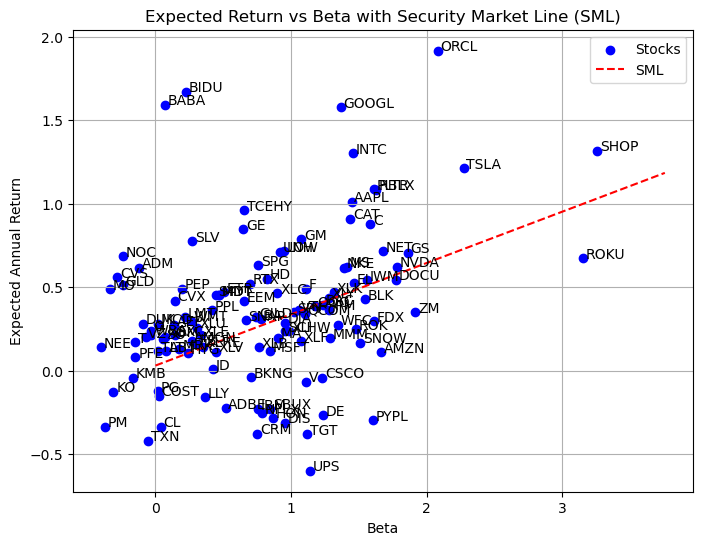

In [3]:

plt.figure(figsize=(8,6))
plt.scatter(df['Beta'], df['Expected_Return'], color='blue', label='Stocks')

beta_range = np.linspace(0, max(df['Beta']) + 0.5, 100)
sml = rf + beta_range * (rm - rf)
plt.plot(beta_range, sml, color='red', linestyle='--', label='SML')

for i, row in df.iterrows():
    plt.text(row['Beta']+0.02, row['Expected_Return'], row['Ticker'])

plt.xlabel('Beta')
plt.ylabel('Expected Annual Return')
plt.title('Expected Return vs Beta with Security Market Line (SML)')
plt.legend()
plt.grid(True)
plt.show()


Ejercicio:

Ajusta una regresion lineal a los puntos y compara la recta con la SML, interpreta lo que creas que significan los resultados de esta comparacion. (si lo consideras adecuado puedes usar algun tipo de regresion con regularizacion)

In [5]:
from sklearn.linear_model import Ridge

Regresión Ridge: y = 0.1795 + 0.2238 * Beta


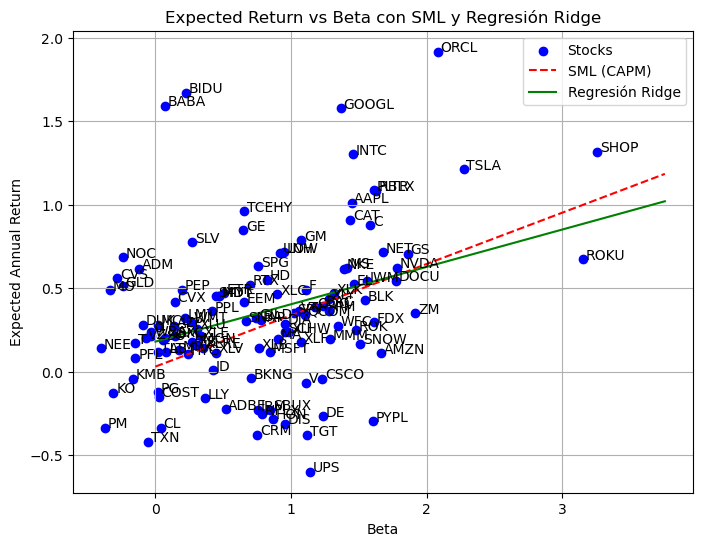

In [6]:
returns = data.pct_change().dropna()
market_returns = returns[market_index]

def calculate_beta(stock_returns, market_returns):
    covariance = np.cov(stock_returns, market_returns)[0, 1]
    variance = np.var(market_returns)
    beta = covariance / variance
    return beta

rf = 0.03  # 3%
rm = market_returns.mean() * 252

betas = {}
expected_returns = {}
for ticker in tickers:
    betas[ticker] = calculate_beta(returns[ticker], market_returns)
    expected_returns[ticker] = returns[ticker].mean() * 252  # Annualizado

df = pd.DataFrame({
    'Ticker': tickers,
    'Beta': [betas[t] for t in tickers],
    'Expected_Return': [expected_returns[t] for t in tickers]
})

# -----------------------------
# Regresión con regularización (Ridge)
# -----------------------------
X = df['Beta'].values.reshape(-1, 1)
y = df['Expected_Return'].values

ridge = Ridge(alpha=0.1)  # α controla la regularización
ridge.fit(X, y)

alpha_intercept = ridge.intercept_
beta_slope = ridge.coef_[0]

print(f"Regresión Ridge: y = {alpha_intercept:.4f} + {beta_slope:.4f} * Beta")

# -----------------------------
# Graficar
# -----------------------------
plt.figure(figsize=(8,6))
plt.scatter(df['Beta'], df['Expected_Return'], color='blue', label='Stocks')

# Security Market Line (CAPM)
beta_range = np.linspace(0, max(df['Beta']) + 0.5, 100)
sml = rf + beta_range * (rm - rf)
plt.plot(beta_range, sml, color='red', linestyle='--', label='SML (CAPM)')

# Línea ajustada por Ridge
y_pred = ridge.predict(beta_range.reshape(-1, 1))
plt.plot(beta_range, y_pred, color='green', label='Regresión Ridge')

# Etiquetas de los puntos
for i, row in df.iterrows():
    plt.text(row['Beta']+0.02, row['Expected_Return'], row['Ticker'])

plt.xlabel('Beta')
plt.ylabel('Expected Annual Return')
plt.title('Expected Return vs Beta con SML y Regresión Ridge')
plt.legend()
plt.grid(True)
plt.show()


#### Interpretación de resultados 
La línea del CAPM (roja) dice que mientras más riesgo de mercado (beta) tenga una acción, mayor debería ser su rendimiento esperado. Pero en la práctica, la regresión Ridge (verde) muestra que los rendimientos reales no siguen tanto esa lógica: incluso acciones con poco riesgo tuvieron retornos altos (intercepto ~18%), y la pendiente es más plana, lo que significa que las acciones más arriesgadas no siempre dieron rendimientos mucho mayores. En pocas palabras, los datos recientes no encajan del todo con lo que predice el CAPM.